In [2]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import diagonalization, sparse_magnetization
from qs_mps.mps_class import MPS

### Confined Phase

In [3]:
L = 3
l = 3
dof = 2*l*L - l - L
print(dof)
ladder = H_Z2_gauss(l=3,L=L, model="Z2", lamb=0, J=1)
H = ladder.hamiltonian()

12


In [4]:
e, v = diagonalization(H, sparse=False)
print(e)

[-1.2000e+01 -4.0000e+00 -4.0000e+00 ...  3.2004e+04  3.2004e+04
  3.2004e+04]


In [6]:
print(v[:,0])
print((1/np.sqrt(2))**dof)

[-0.015625+0.j -0.015625+0.j -0.015625+0.j ... -0.015625+0.j -0.015625+0.j
 -0.015625+0.j]
0.015624999999999983


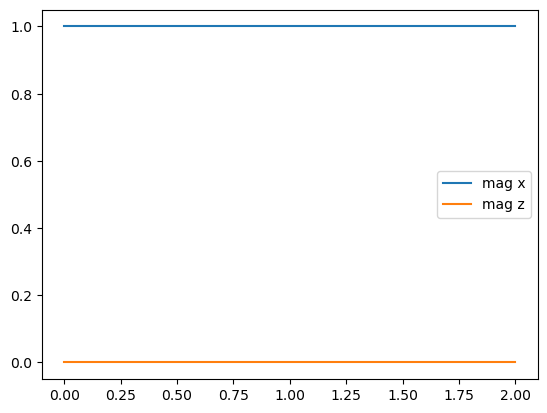

In [7]:
psi = v[:,0]
mag_x = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=12)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=12)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

## Add an external field

In [27]:
L = 3
l = 4
mag_x = []
mag_x_st = []
dof = 2*l*L - l - L
print(f"dof direct lattice: {dof}")
v0 = np.full(2**dof, (1/np.sqrt(2))**dof)
for lamb in np.logspace(1,-3,100):
    print(f"transverse field: {lamb}")
    ladder = H_Z2_gauss(J=lamb, lamb=1/lamb, model="Z2", L=L, l=l)
    H = ladder.hamiltonian()
    e, v = diagonalization(H, sparse=True, v0=v0)
    psi = v[:,0]
    mag = (psi.conjugate() @ sparse_magnetization(L=dof) @ psi).real
    mag_x.append(mag)
    v0 = psi

dof direct lattice: 17
transverse field: 10.0
transverse field: 9.111627561154892
transverse field: 8.302175681319746
transverse field: 7.564633275546289
transverse field: 6.892612104349697
transverse field: 6.280291441834253
transverse field: 5.722367659350217
transverse field: 5.214008287999684
transverse field: 4.750810162102796
transverse field: 4.328761281083058
transverse field: 3.944206059437655
transverse field: 3.5938136638046276
transverse field: 3.2745491628777286
transverse field: 2.983647240283339
transverse field: 2.71858824273294
transverse field: 2.4770763559917106
transverse field: 2.2570197196339197
transverse field: 2.0565123083486507
transverse field: 1.8738174228603839
transverse field: 1.7073526474706904
transverse field: 1.5556761439304714
transverse field: 1.417474162926805
transverse field: 1.2915496650148837
transverse field: 1.1768119524349983
transverse field: 1.072267222010323
transverse field: 0.9770099572992251
transverse field: 0.8902150854450384
transve

0.9999955882398862


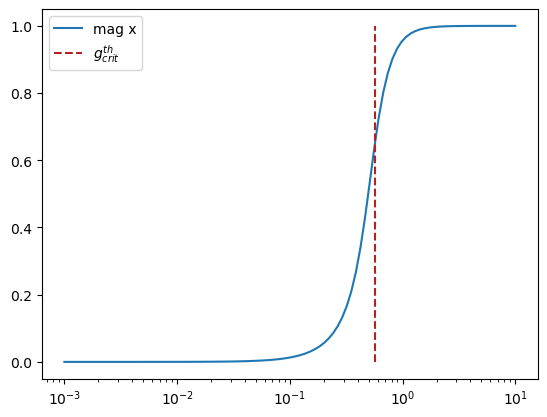

In [28]:
print(mag_x[0])
plt.plot(np.logspace(1,-3,100), mag_x,label="mag x")
plt.vlines(x=1/np.sqrt(3.044), ymin=np.min(mag_x), ymax=np.max(mag_x), color='firebrick', linestyle='--', label="$g_{crit}^{th}$")
plt.xscale('log')
plt.legend()
plt.show()

In [22]:
print(ladder.latt._lattice_drawer.draw_lattice())

      +-- 5--+-- 6--+      
      |      |      |      
      10     11     12
      |      |      |      
      +-- 3--+-- 4--+      
      |      |      |      
      7      8      9 
      |      |      |      
      +-- 1--+-- 2--+      



## Make it 2D

In [13]:
L = 12
mag_x = []
mag_x_st = []
mag_z = []
rdms = []
i = 0.01
f = 1.5
delta = 32
eps = 1e-1
grid_h = np.linspace(i, f, delta).tolist()
grid_h.reverse()
grid_k = np.linspace(i, f, delta)

v0 = np.zeros((2**L,1))
v0[0] = 1

for k in grid_k:
    mag_x_j = []
    mag_x_st_j = []
    mag_z_j = []
    rdm_j = []
    for h in grid_h:
        print(f"transverse field h: {h} for k: {k}")
        lattice = H_Z2_gauss(l=l, L=L, model="Z2_dual", lamb=h, eps=eps, deg_method=1)
        H = lattice.hamiltonian()
        e, v = diagonalization(H, sparse=True, v0=v0)
        psi = v[:,0]
        mag = (psi.conjugate() @ sparse_magnetization(L=L) @ psi).real
        mag_x_j.append(mag)
        mag = (psi.conjugate() @ sparse_magnetization(L=L, staggered=True) @ psi).real
        mag_x_st_j.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_j.append(mag)
        v0 = psi

        chain = MPS(L=L, d=2, model="ANNNI", chi=64)
        chain.vector_to_mps(vec=psi, chi=64)
        rdm = chain.reduced_density_matrix([L//2-2,L//2-1,L//2,L//2+1])
        rdm_j.append(rdm)

    mag_x_j.reverse()
    mag_x_st_j.reverse()
    mag_z_j.reverse()
    rdm_j.reverse()
    mag_x.append(mag_x_j)
    mag_x_st.append(mag_x_st_j)
    mag_z.append(mag_z_j)
    rdms.append(rdm_j)

mag_x = np.asarray(mag_x)
mag_x_st = np.asarray(mag_x_st)
mag_z = np.asarray(mag_z)
rdms = np.asarray(rdms)

transverse field h: 1.5 for k: 0.01
transverse field h: 1.4519354838709677 for k: 0.01
transverse field h: 1.4038709677419354 for k: 0.01
transverse field h: 1.3558064516129031 for k: 0.01
transverse field h: 1.307741935483871 for k: 0.01
transverse field h: 1.2596774193548388 for k: 0.01
transverse field h: 1.2116129032258065 for k: 0.01
transverse field h: 1.1635483870967742 for k: 0.01
transverse field h: 1.115483870967742 for k: 0.01
transverse field h: 1.0674193548387096 for k: 0.01
transverse field h: 1.0193548387096774 for k: 0.01
transverse field h: 0.9712903225806452 for k: 0.01
transverse field h: 0.9232258064516129 for k: 0.01
transverse field h: 0.8751612903225807 for k: 0.01
transverse field h: 0.8270967741935484 for k: 0.01
transverse field h: 0.7790322580645161 for k: 0.01
transverse field h: 0.7309677419354839 for k: 0.01
transverse field h: 0.6829032258064516 for k: 0.01
transverse field h: 0.6348387096774194 for k: 0.01
transverse field h: 0.5867741935483871 for k: 0.

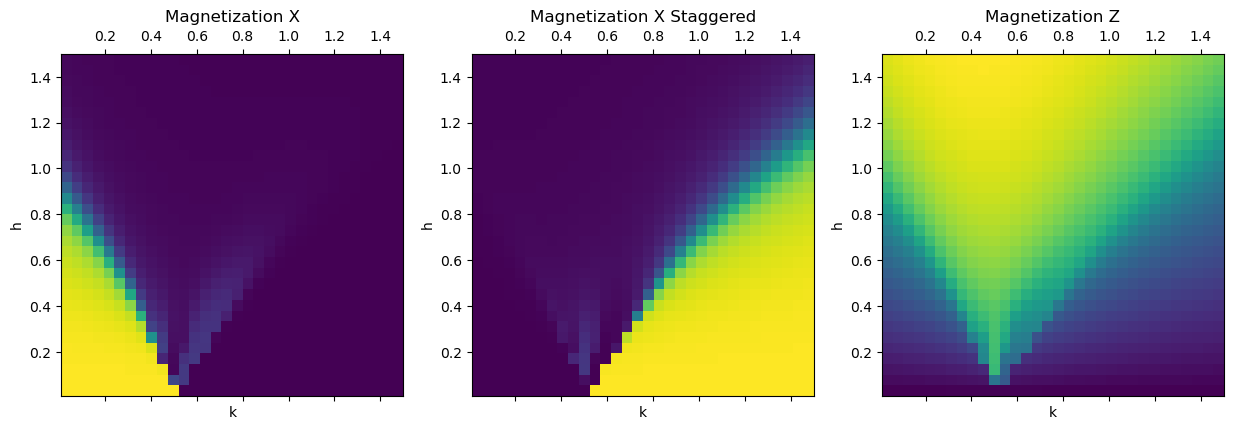

In [14]:
params = [[h,k] for h in grid_h for k in grid_k]
params_extent = np.concatenate([np.min(params, axis=0), np.max(params, axis=0)])
params_extent = tuple(params_extent[[0, 2, 1, 3]])

fig, ax = plt.subplots(1,3, figsize=(15,10))
ax[0].matshow(mag_x.T, origin='lower', extent=params_extent)
ax[0].set_title("Magnetization X")
ax[0].set_xlabel("k")
ax[0].set_ylabel("h")
ax[1].matshow(mag_x_st.T, origin='lower', extent=params_extent)
ax[1].set_title("Magnetization X Staggered")
ax[1].set_xlabel("k")
ax[1].set_ylabel("h")
ax[2].matshow(mag_z.T, origin='lower', extent=params_extent)
ax[2].set_title("Magnetization Z")
ax[2].set_xlabel("k")
ax[2].set_ylabel("h");

In [15]:
path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/X_4-rdms_ANNNI_L_{L}_h-k_{i}-{f}_delta_{delta}_degeneracy_method_1_eps_{eps}_guess_path.npy", rdms)